In [6]:
import warnings, platform
from IPython.display import display, HTML

import matplotlib.pyplot as plt

In [7]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [8]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

# 데이터 확인 및 전처리

- 데이터 설명
- 철강데이터 종속변수 : target
- 데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates

In [3]:
steel = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/15/problem1.csv')
steel.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


## 1.1 EDA와 시각화 및 통계량 제시

## 1.2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%)) ,시각화와 통계량을 제시하시오

## 1.3 종속변수들중 “1”인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값으로 치환하고 로지스틱 회귀 분석을 실시하라. confusionMatrix를 확인 및 cut off value 정하여라

## 1.4 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라

## 1.5 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라. 군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라

# 전력사용량 시계열 문제
### 데이터 설명
> - 데이터 설명 : 2050년 1년동안의 5유형(A,B,C,D,E)의 전력사용량을 나타낸다. 각유형의 전력사용량은 1분마다 갱신되며 그 값은 누적된다. 6시간이 지나면(00:00, 06:00, 12:00, 18:00시에) 전력사용량은 0으로 초기화 된다.
> - **problem2_usage.csv**: 6시간 간격의 총 전력사용량의 데이터이다. timestamp순서는 섞여있다. 6시간 간격의 특정 시간대(마지막시각 ‘05:59’,’11:59’,’17:59’,’23:59’)의 전력 총합을 나타낸다. 데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.
> - **problem2_usage_history.csv**: 1분간격의 A,B,C,D,E 유형의 소비 누적 전력을 나타낸다. 같은 6시간간격의 시간대의 데이터는 같은 “6hour_index”값을 가진다. 00:00, 06:00, 12:00, 18:00시에는 5유형의 전력은 초기화 된다. 데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.
> - **problem2_avg_tem.csv**: 2050년 1년동안 일자별 평균 온도를 나타낸다
- 출처: https://www.datamanim.com/dataset/ADPpb/00/15.html

In [81]:
usage = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/15/problem2_usage.csv')
usage_history = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/15/problem2_usage_history.csv')
avg_tem = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/15/problem2_avg_tem.csv')

## 2-1. usage의 총사용량을 아래와 같은 모양으로 연월별 총합으로 계산하여 CSV 파일로 작성하시오
- 일자별 총사용량은 누적사용량이 갱신되기 직전의 최대값들의 합으로 계산한다
- [‘05:59’,’11:59’,’17:59’,’23:59’] 시간대의 A,B,C,D,E의 컬럼별 총합이 각 유형의 일일 사용량이다
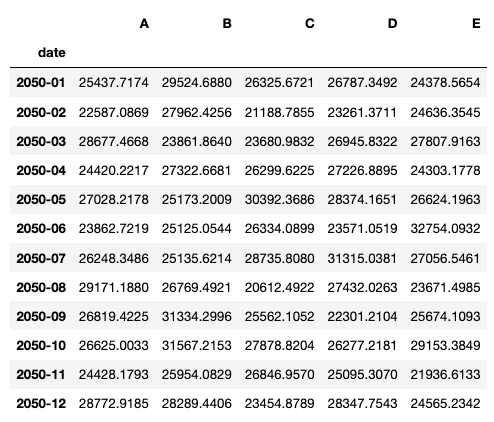

In [82]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1460 non-null   int64  
 1   usage      1460 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [83]:
### timestamp 변환
usage['time'] = pd.to_datetime(usage.timestamp, unit='s')
usage = usage.sort_values('time').reset_index(drop=True)

In [86]:
usage

,timestamp,usage,time
0,2524629540,1654.2596,2050-01-01 05:59:00
1,2524651140,1426.9071,2050-01-01 11:59:00
2,2524672740,1448.2517,2050-01-01 17:59:00
3,2524694340,1338.0897,2050-01-01 23:59:00
4,2524715940,1567.5820,2050-01-02 05:59:00
...,...,...,...
1455,2556057540,830.1747,2050-12-30 23:59:00
1456,2556079140,1353.2138,2050-12-31 05:59:00
1457,2556100740,841.3836,2050-12-31 11:59:00
1458,2556122340,1439.1423,2050-12-31 17:59:00


In [75]:
usage_history

,hh:mm,6hour_index,A,B,C,D,E
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022
3,00:03,DA_588493,2.1075,1.6057,2.1744,6.4229,1.0538
4,00:04,DA_588493,2.8100,2.4086,2.6093,6.9582,1.2043
...,...,...,...,...,...,...,...
525595,23:55,DA_2650332,56.1072,357.1460,316.9747,298.3290,823.7400
525596,23:56,DA_2650332,56.2778,358.2261,318.5853,299.2385,825.4075
525597,23:57,DA_2650332,56.6757,358.5861,318.9074,299.5417,827.0750
525598,23:58,DA_2650332,56.7326,359.3062,320.8402,301.6640,827.9087


In [89]:
### 특정 시간만 추출
usage_history_sampled = usage_history[usage_history['hh:mm'].isin(['05:59','11:59','17:59','23:59'])]
usage_history_sampled['usage'] = usage_history_sampled.iloc[:, 2:].sum(axis=1).round(4)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
usage_history_sampled.reset_index(drop=True)
usage_history_sampled

,hh:mm,6hour_index,A,B,C,D,E,usage
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,1654.2596
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,1426.9071
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,1448.2517
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803,1338.0897
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981,1567.5820
...,...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121,830.1747
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012,1353.2138
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906,841.3836
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840,1439.1423


In [122]:
### 부동소수점 에러 조정
usage['usage'] = round(usage['usage'], 4)
usage_history_sampled['usage'] = round(usage_history_sampled['usage'], 4)

### merge
merged = pd.merge(usage_history_sampled, usage, on='usage', how='left')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
### NA 없음
merged.isna().sum()

hh:mm          0
6hour_index    0
A              0
B              0
C              0
D              0
E              0
usage          0
timestamp      0
time           0
dtype: int64

In [125]:
### 필요한 변수 선택
merged = merged.iloc[:, 2:].drop(['timestamp', 'usage'], axis=1)
merged

,A,B,C,D,E,time
0,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00
1,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00
2,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00
3,162.1927,297.3533,94.6124,716.3510,67.5803,2050-01-01 23:59:00
4,269.1807,490.8591,63.3366,142.5075,601.6981,2050-01-02 05:59:00
...,...,...,...,...,...,...
1455,125.7840,67.0849,75.4704,394.1233,167.7121,2050-12-30 23:59:00
1456,505.7466,82.0129,109.3506,437.4025,218.7012,2050-12-31 05:59:00
1457,110.4847,501.4306,16.9977,144.4800,67.9906,2050-12-31 11:59:00
1458,639.6188,232.5887,72.6839,421.5669,72.6840,2050-12-31 17:59:00


In [127]:
merged['date'] = merged['time'].dt.strftime('%Y-%m')
merged.groupby('date').sum()

,A,B,C,D,E
date,,,,,
2050-01,25437.7174,29524.6880,26325.6721,26787.3492,24378.5654
2050-02,22587.0869,27962.4256,21188.7855,23261.3711,24636.3545
2050-03,28677.4668,23861.8640,23680.9832,26945.8322,27807.9163
2050-04,24420.2217,27322.6681,26299.6225,27226.8895,24303.1778
2050-05,27028.2178,25173.2009,30392.3686,28374.1651,26624.1963
2050-06,23862.7219,25125.0544,26334.0899,23571.0519,32754.0932
2050-07,26248.3486,25135.6214,28735.8080,31315.0381,27056.5461
2050-08,29171.1880,26769.4921,20612.4922,27432.0263,23671.4985
2050-09,26819.4225,31334.2996,25562.1052,22301.2104,25674.1093


## 2-2. 가로축을 요일(일~월) 세로축을 평균 전력사용량으로 하는 그래프를 그려라. 각 유형별로 색을 다르게 표현하여 5개의 line plot을 그리며 범례를 표시하라

In [130]:
### 부동소수점 에러 조정
usage['usage'] = round(usage['usage'], 4)
usage_history_sampled['usage'] = round(usage_history_sampled['usage'], 4)

### merge
merged = pd.merge(usage_history_sampled, usage, on='usage', how='left')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [146]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hh:mm        1460 non-null   object        
 1   6hour_index  1460 non-null   object        
 2   A            1460 non-null   float64       
 3   B            1460 non-null   float64       
 4   C            1460 non-null   float64       
 5   D            1460 non-null   float64       
 6   E            1460 non-null   float64       
 7   usage        1460 non-null   float64       
 8   timestamp    1460 non-null   int64         
 9   time         1460 non-null   datetime64[ns]
 10  day          1460 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 136.9+ KB


In [133]:
merged['day'] = merged['time'].dt.day_name()
daydf = merged.groupby(['day']).mean().reindex(['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])

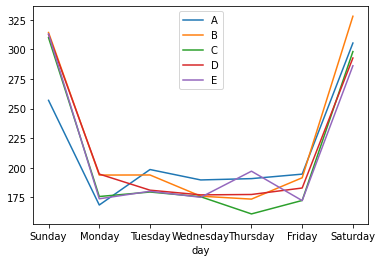

In [151]:
daydf.drop(['usage', 'timestamp'], axis=1, inplace=True)
daydf.plot()
plt.show()

## 2-3. 요일별 각 유형의 평균 전력 사용량 간에 연관성이 있는지 검정하라

In [154]:
from scipy.stats import chi2_contingency

chi2 , p ,dof, expected = chi2_contingency(daydf)
print(chi2, p)

# H0: 요일과 전력 유형에 관계없이 평균 전력 사용량은 동일하다.
# H1: 평균 전력 사용량은 요일과 전력 유형에 따라 차이가 있다.
# 카이제곱 검정 결과 귀무가설을 기각 할 수 없다. 따라서 두 변수는 연관성이 없다고 볼 수 있다.

20.93989421950004 0.6422684883014604


## 2-4. 일자(매일)마다 각 유형의 전력사용량의 합을 데이터프레임으로 구하고 일자 데이터에서의 유형별 온도와의 상관계수를 각각 구하여라

In [156]:
avg_tem['date'] = pd.to_datetime(avg_tem['date'])
avg_tem

,date,temperature
0,2050-01-01,6.164408
1,2050-01-02,1.015510
2,2050-01-03,3.691252
3,2050-01-04,4.071515
4,2050-01-05,0.609249
...,...,...
360,2050-12-27,6.588207
361,2050-12-28,3.201014
362,2050-12-29,0.670169
363,2050-12-30,0.141069


In [161]:
days = merged.groupby(merged.time.dt.date).sum().reset_index().rename(columns={'time':'date'})
days['date'] = pd.to_datetime(days['date'])

In [162]:
days

,date,A,B,C,D,E,usage,timestamp
0,2050-01-01,1583.1230,1748.4258,719.0734,1512.2236,304.6623,5867.5081,10098647760
1,2050-01-02,1084.4828,2167.1320,1227.6223,484.2982,1095.9014,6059.4367,10098993360
2,2050-01-03,152.3612,394.0491,321.2149,982.0407,498.5167,2348.1826,10099338960
3,2050-01-04,1225.0208,769.0568,655.4110,791.3395,834.6589,4275.4870,10099684560
4,2050-01-05,836.8017,552.5661,1216.6259,1042.4509,666.6004,4315.0450,10100030160
...,...,...,...,...,...,...,...,...
360,2050-12-27,1131.9901,944.7511,378.1692,438.1096,785.5438,3678.5638,10223063760
361,2050-12-28,1114.3264,625.4472,1008.9049,914.4681,452.7479,4115.8945,10223409360
362,2050-12-29,990.3719,776.5802,1085.4244,815.7627,367.3374,4035.4766,10223754960
363,2050-12-30,1463.7257,908.3342,655.1917,539.5316,852.7281,4419.5113,10224100560


In [176]:
pd.merge(days, avg_tem, on='date').drop(['date', 'usage', 'timestamp'], axis=1).corr().loc[:'E', 'temperature']
# 온도와 각 유형별 상관계수
# A    0.001472
# B   -0.048002
# C    0.045952
# D   -0.010146
# E    0.074246

A    0.001472
B   -0.048002
C    0.045952
D   -0.010146
E    0.074246
Name: temperature, dtype: float64